# Installing relevenat Libraries and packages

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

import xgboost

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Importing Dataset

In [221]:
dataset = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

# Performing EDA

In [222]:
dataset.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [223]:
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [224]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [225]:
dataset.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Plotting Graphs

<Axes: xlabel='Diabetes_binary', ylabel='Count'>

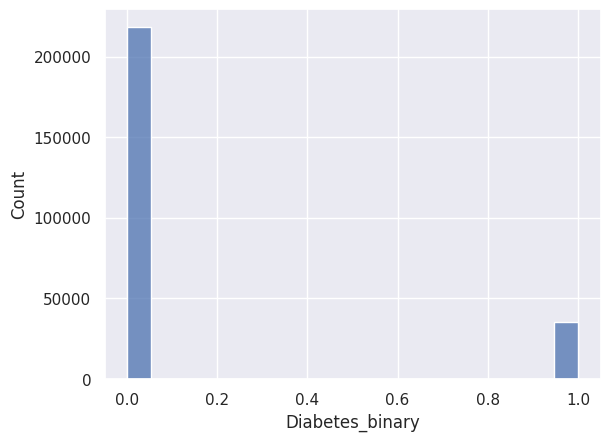

In [226]:
sns.histplot(dataset, x='Diabetes_binary')

[Text(0.5, 1.0, 'Distribution of BMI')]

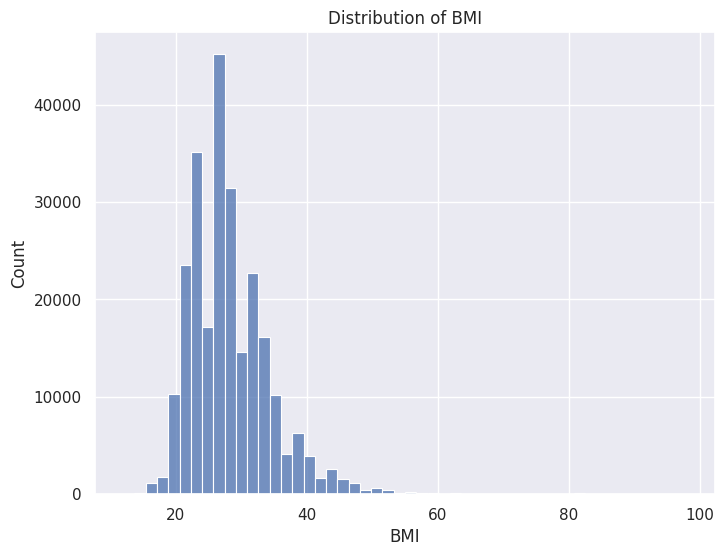

In [227]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['BMI'],bins=50).set(title='Distribution of BMI')

[Text(0.5, 1.0, 'Distribution of Age Group')]

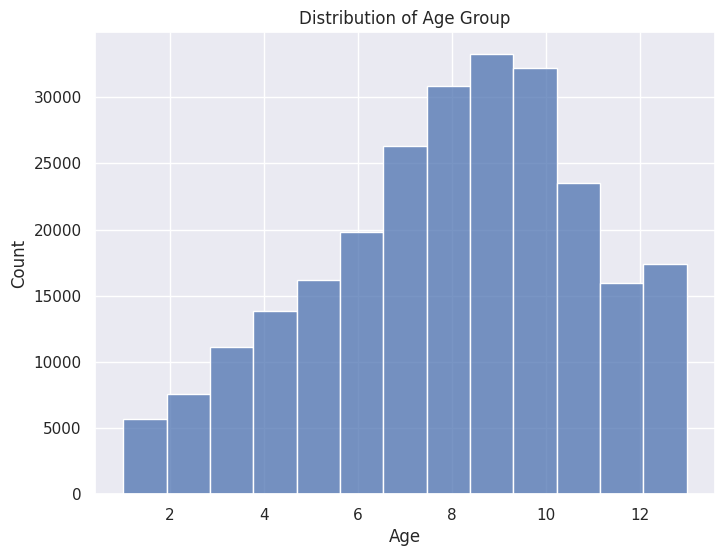

In [228]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Age'], bins=13).set(title='Distribution of Age Group')

[Text(0.5, 1.0, 'Distribution of Education Group')]

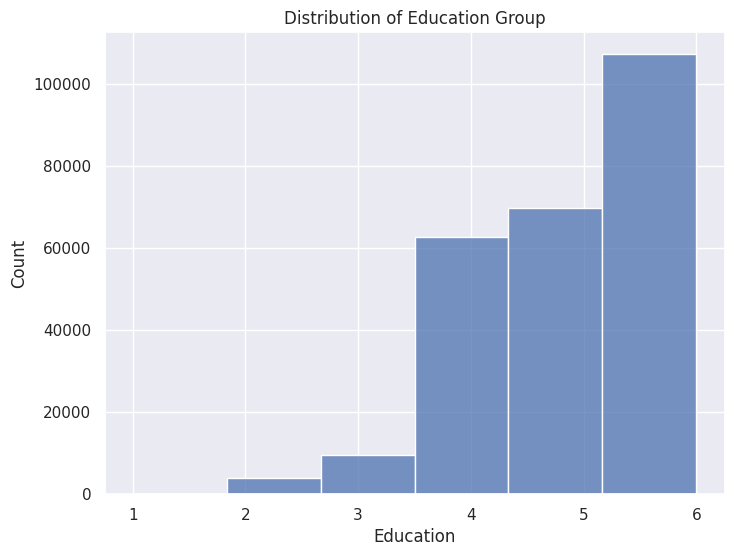

In [229]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Education'],bins=6).set(title='Distribution of Education Group')

[Text(0.5, 1.0, 'Distribution of Income Group')]

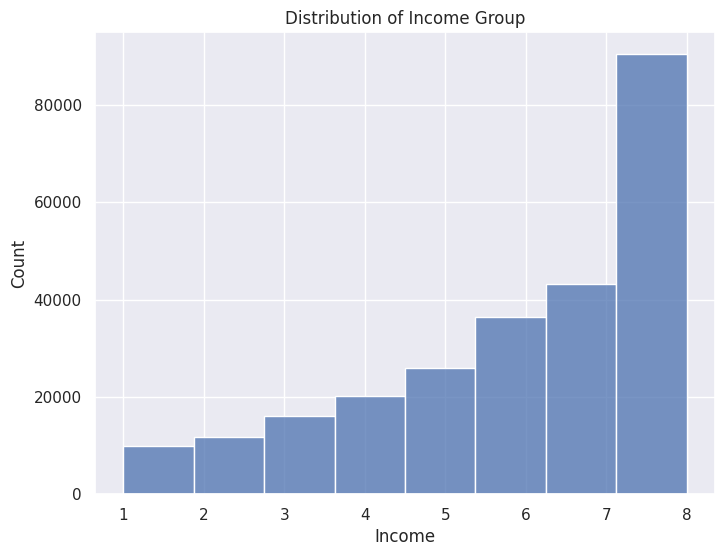

In [230]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Income'],bins=8).set(title='Distribution of Income Group')

## Removing Outliers

<ipython-input-231-f5ecac4339c7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['BMI'])
<ipython-input-231-f5ecac4339c7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'], bins=10)


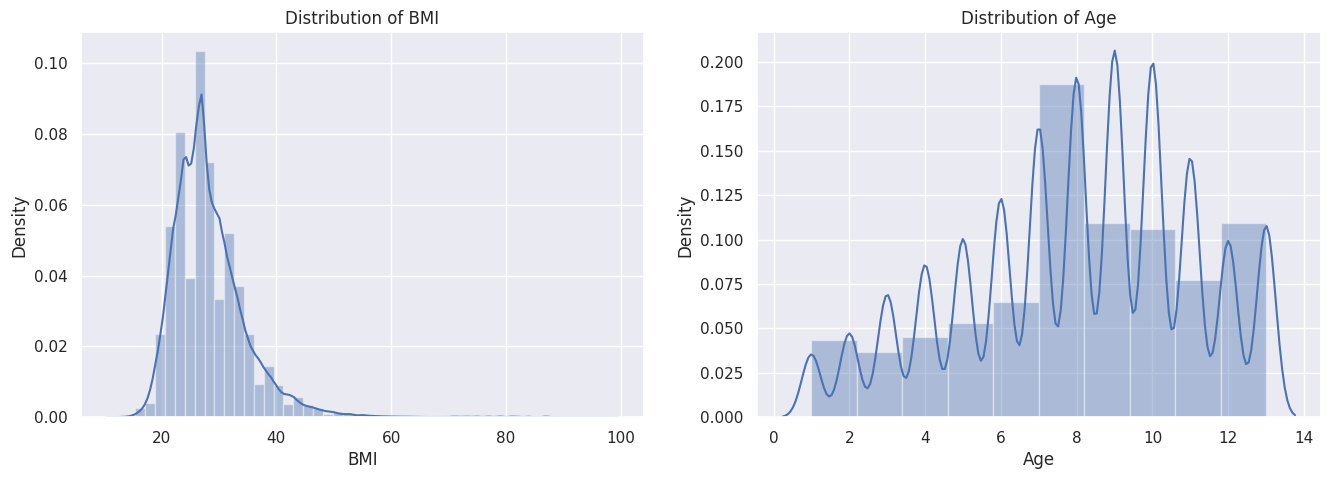

In [231]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title("Distribution of BMI")
sns.distplot(dataset['BMI'])
plt.subplot(1,2,2)
plt.title("Distribution of Age")
sns.distplot(dataset['Age'], bins=10)
plt.show()

[Text(0.5, 1.0, 'Box plot of BMI')]

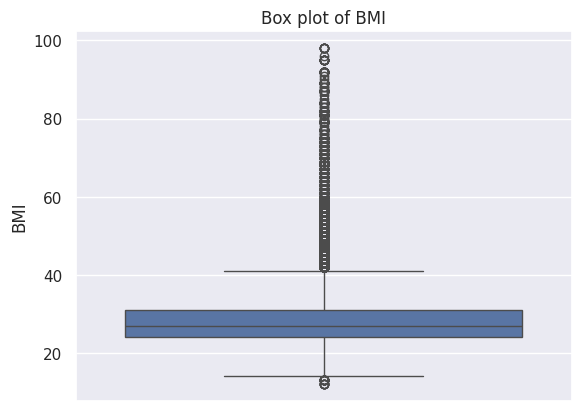

In [232]:
sns.boxplot(dataset['BMI']).set(title='Box plot of BMI')

In [233]:
percentile25 = dataset['BMI'].quantile(0.25)
percentile75 = dataset['BMI'].quantile(0.75)
iqr = percentile75 - percentile25

In [234]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [235]:
dataset[dataset['BMI'] > upper_limit]
dataset[dataset['BMI'] < lower_limit]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
38979,0.0,1.0,1.0,1.0,13.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,30.0,30.0,1.0,0.0,10.0,5.0,1.0
40601,0.0,0.0,0.0,1.0,13.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,2.0,1.0,1.0,5.0,6.0,3.0
49827,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,0.0,1.0,0.0,1.0,9.0,2.0,8.0
79789,0.0,0.0,1.0,1.0,13.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,7.0,0.0,0.0,10.0,5.0,4.0
80280,0.0,1.0,1.0,1.0,13.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,6.0,5.0
98002,0.0,0.0,0.0,1.0,12.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,15.0,0.0,0.0,1.0,11.0,6.0,7.0
102782,0.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,6.0,4.0
121195,0.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,1.0
125781,0.0,0.0,0.0,1.0,13.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,5.0,14.0,14.0,0.0,0.0,7.0,4.0,6.0
133672,1.0,0.0,1.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,2.0,1.0,1.0,6.0,4.0,8.0


In [236]:
new_df = dataset[dataset['BMI'] < upper_limit]
new_df.shape

(243860, 22)

<ipython-input-237-4947c23e98cd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['BMI'])
<ipython-input-237-4947c23e98cd>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['BMI'])


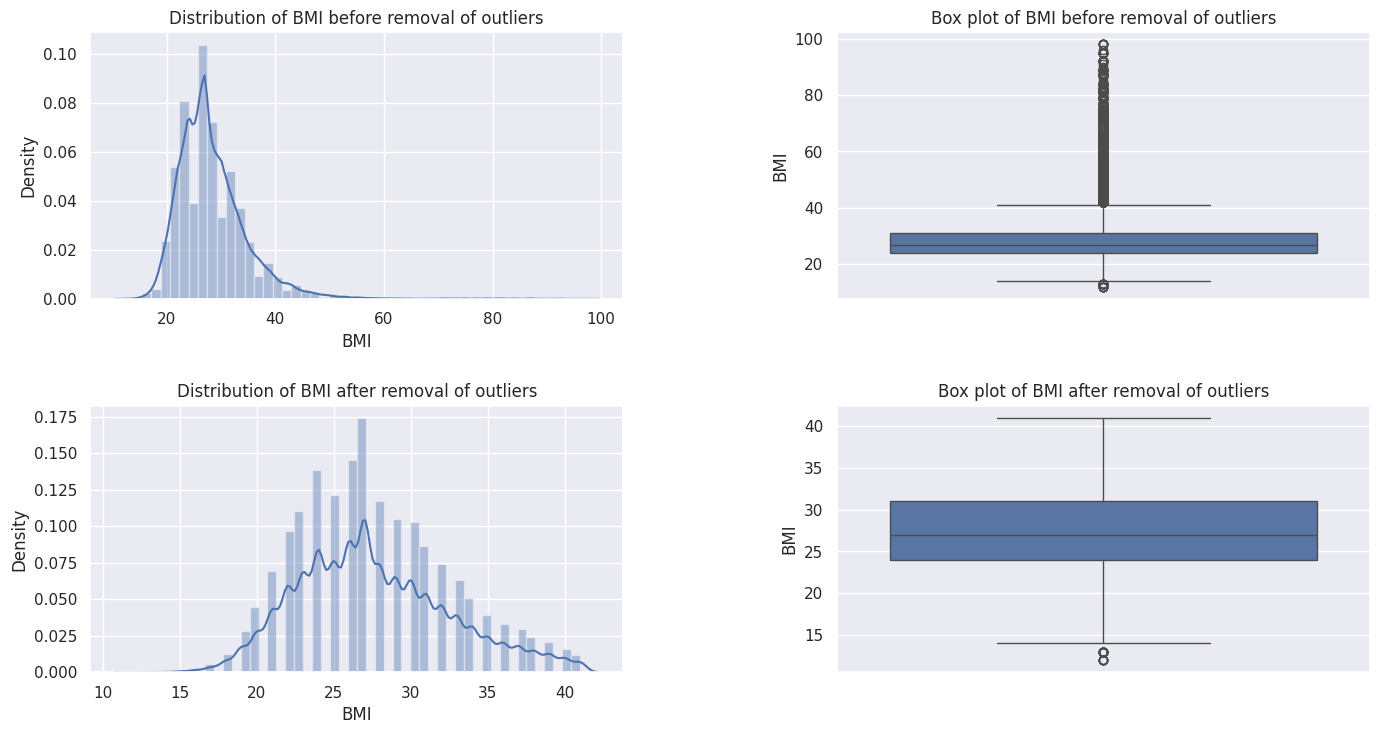

In [237]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(dataset['BMI'])
plt.title("Distribution of BMI before removal of outliers")
plt.subplot(2,2,2)
sns.boxplot(dataset['BMI'])
plt.title("Box plot of BMI before removal of outliers")

plt.subplot(2,2,3)
sns.distplot(new_df['BMI'])
plt.title("Distribution of BMI after removal of outliers")
plt.subplot(2,2,4)
sns.boxplot(new_df['BMI'])
plt.title("Box plot of BMI after removal of outliers")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

<ipython-input-238-af8248265b77>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['MentHlth'])
<ipython-input-238-af8248265b77>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['PhysHlth'])


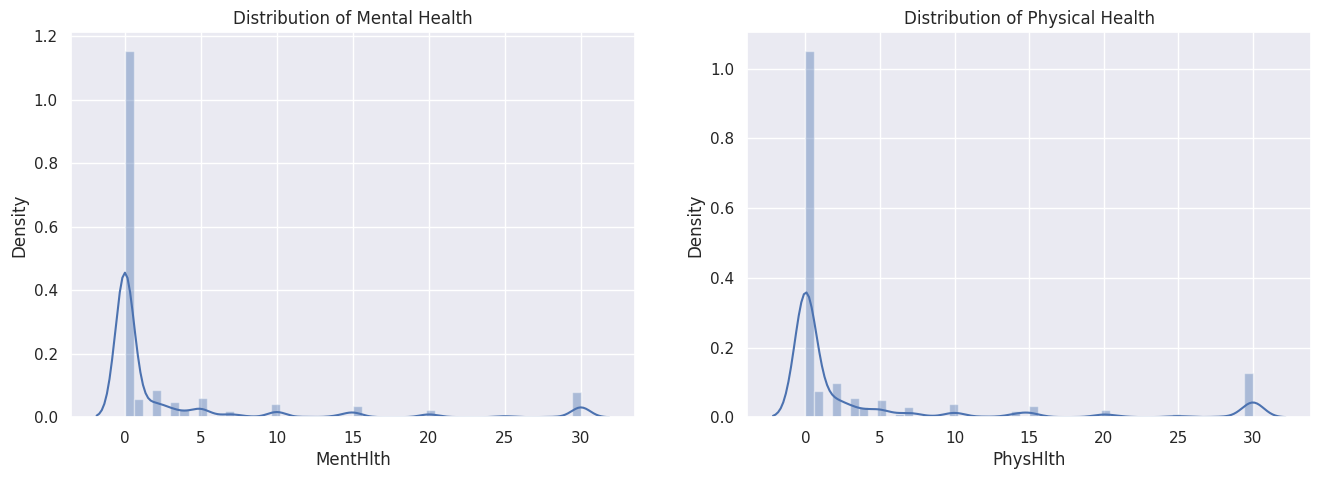

In [238]:
# prompt: plot histogram dataset['MentHlth'] and dataset['PhysHlth']

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title("Distribution of Mental Health")
sns.distplot(dataset['MentHlth'])
plt.subplot(1,2,2)
plt.title("Distribution of Physical Health")
sns.distplot(dataset['PhysHlth'])
plt.show()


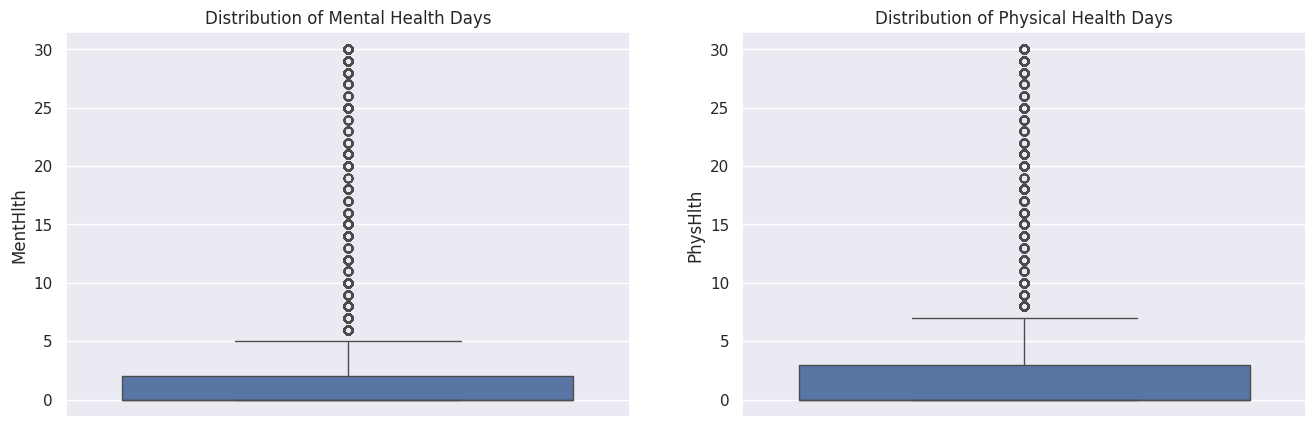

In [239]:
# prompt: boxplot the dataset['MentHlth'] and dataset['PhysHlth']

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title("Distribution of Mental Health Days")
sns.boxplot(dataset['MentHlth'])
plt.subplot(1,2,2)
plt.title("Distribution of Physical Health Days")
sns.boxplot(dataset['PhysHlth'])
plt.show()


In [240]:
# # remove the outlier from datatset['MenHlth'] and dataset['PhysHlth']

# # remove outlier from dataset['MenHlth']
# percentile25 = new_df['MentHlth'].quantile(0.25)
# percentile75 = new_df['MentHlth'].quantile(0.75)
# iqr = percentile75 - percentile25
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr
# new_df = new_df[new_df['MentHlth'] < upper_limit]
# new_df = new_df[new_df['MentHlth'] > lower_limit]

# # remove outlier from dataset['PhysHlth']
# percentile25 = new_df['PhysHlth'].quantile(0.25)
# percentile75 = new_df['PhysHlth'].quantile(0.75)
# iqr = percentile75 - percentile25
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr
# new_df = new_df[new_df['PhysHlth'] < upper_limit]
# new_df = new_df[new_df['PhysHlth'] > lower_limit]


In [241]:
# plt.figure(figsize=(16,8))
# plt.subplot(2,2,1)
# sns.distplot(dataset['MentHlth'])
# plt.title("Distribution of MentHlth before removal of outliers")
# plt.subplot(2,2,2)
# sns.boxplot(dataset['MentHlth'])
# plt.title("Box plot of MentHlth before removal of outliers")

# plt.subplot(2,2,3)
# sns.distplot(new_df['MentHlth'])
# plt.title("Distribution of MentHlth after removal of outliers")
# plt.subplot(2,2,4)
# sns.boxplot(new_df['MentHlth'])
# plt.title("Box plot of MentHlth after removal of outliers")
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
#                     hspace=0.4)
# plt.show()

In [242]:
# plt.figure(figsize=(16,8))
# plt.subplot(2,2,1)
# sns.distplot(dataset['PhysHlth'])
# plt.title("Distribution of PhysHlth before removal of outliers")
# plt.subplot(2,2,2)
# sns.boxplot(dataset['PhysHlth'])
# plt.title("Box plot of PhysHlth before removal of outliers")

# plt.subplot(2,2,3)
# sns.distplot(new_df['PhysHlth'])
# plt.title("Distribution of PhysHlth after removal of outliers")
# plt.subplot(2,2,4)
# sns.boxplot(new_df['PhysHlth'])
# plt.title("Box plot of PhysHlth after removal of outliers")
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
#                     hspace=0.4)
# plt.show()

In [243]:
# removing NaN values

dataset = dataset.dropna()

## Finding Correlation between Independent variables

In [244]:
new_df.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.255514,0.195269,0.063192,0.212372,0.061483,0.105799,0.176213,-0.108373,-0.038091,...,0.017210,0.027579,0.281878,0.059874,0.158035,0.200151,0.039042,0.182031,-0.120023,-0.155211
HighBP,0.255514,1.000000,0.299446,0.097242,0.227146,0.099616,0.130700,0.210033,-0.119024,-0.038019,...,0.039487,0.013829,0.293877,0.051053,0.153934,0.212976,0.056668,0.351564,-0.139127,-0.166101
HighChol,0.195269,0.299446,1.000000,0.086453,0.131981,0.091971,0.092513,0.180944,-0.076087,-0.040276,...,0.043353,0.011337,0.207795,0.059872,0.118319,0.141085,0.033034,0.275261,-0.069618,-0.083331
CholCheck,0.063192,0.097242,0.086453,1.000000,0.037600,-0.010290,0.024419,0.044467,0.005441,0.024435,...,0.117635,-0.058879,0.045816,-0.010264,0.030602,0.038604,-0.021458,0.090940,0.002253,0.015796
BMI,0.212372,0.227146,0.131981,0.037600,1.000000,0.022905,0.019393,0.059415,-0.127048,-0.088587,...,-0.009590,0.043470,0.218272,0.055084,0.083581,0.151588,0.096386,-0.003361,-0.104270,-0.066093
Smoker,0.061483,0.099616,0.091971,-0.010290,0.022905,1.000000,0.062050,0.115083,-0.089524,-0.079447,...,-0.024834,0.050659,0.166899,0.092509,0.117299,0.124602,0.093996,0.122154,-0.163505,-0.126044
Stroke,0.105799,0.130700,0.092513,0.024419,0.019393,0.062050,1.000000,0.202350,-0.068899,-0.013321,...,0.009057,0.032653,0.178982,0.068401,0.148370,0.177998,0.004561,0.128100,-0.076191,-0.128385
HeartDiseaseorAttack,0.176213,0.210033,0.180944,0.044467,0.059415,0.115083,0.202350,1.000000,-0.085668,-0.019127,...,0.018798,0.029794,0.259345,0.062099,0.179895,0.212314,0.087366,0.223650,-0.099294,-0.139505
PhysActivity,-0.108373,-0.119024,-0.076087,0.005441,-0.127048,-0.089524,-0.068899,-0.085668,1.000000,0.141021,...,0.036266,-0.060182,-0.258321,-0.119674,-0.211224,-0.242056,0.027393,-0.094543,0.200122,0.195244
Fruits,-0.038091,-0.038019,-0.040276,0.024435,-0.088587,-0.079447,-0.013321,-0.019127,0.141021,1.000000,...,0.030971,-0.043059,-0.101538,-0.066623,-0.042930,-0.044881,-0.094059,0.063207,0.110038,0.078337


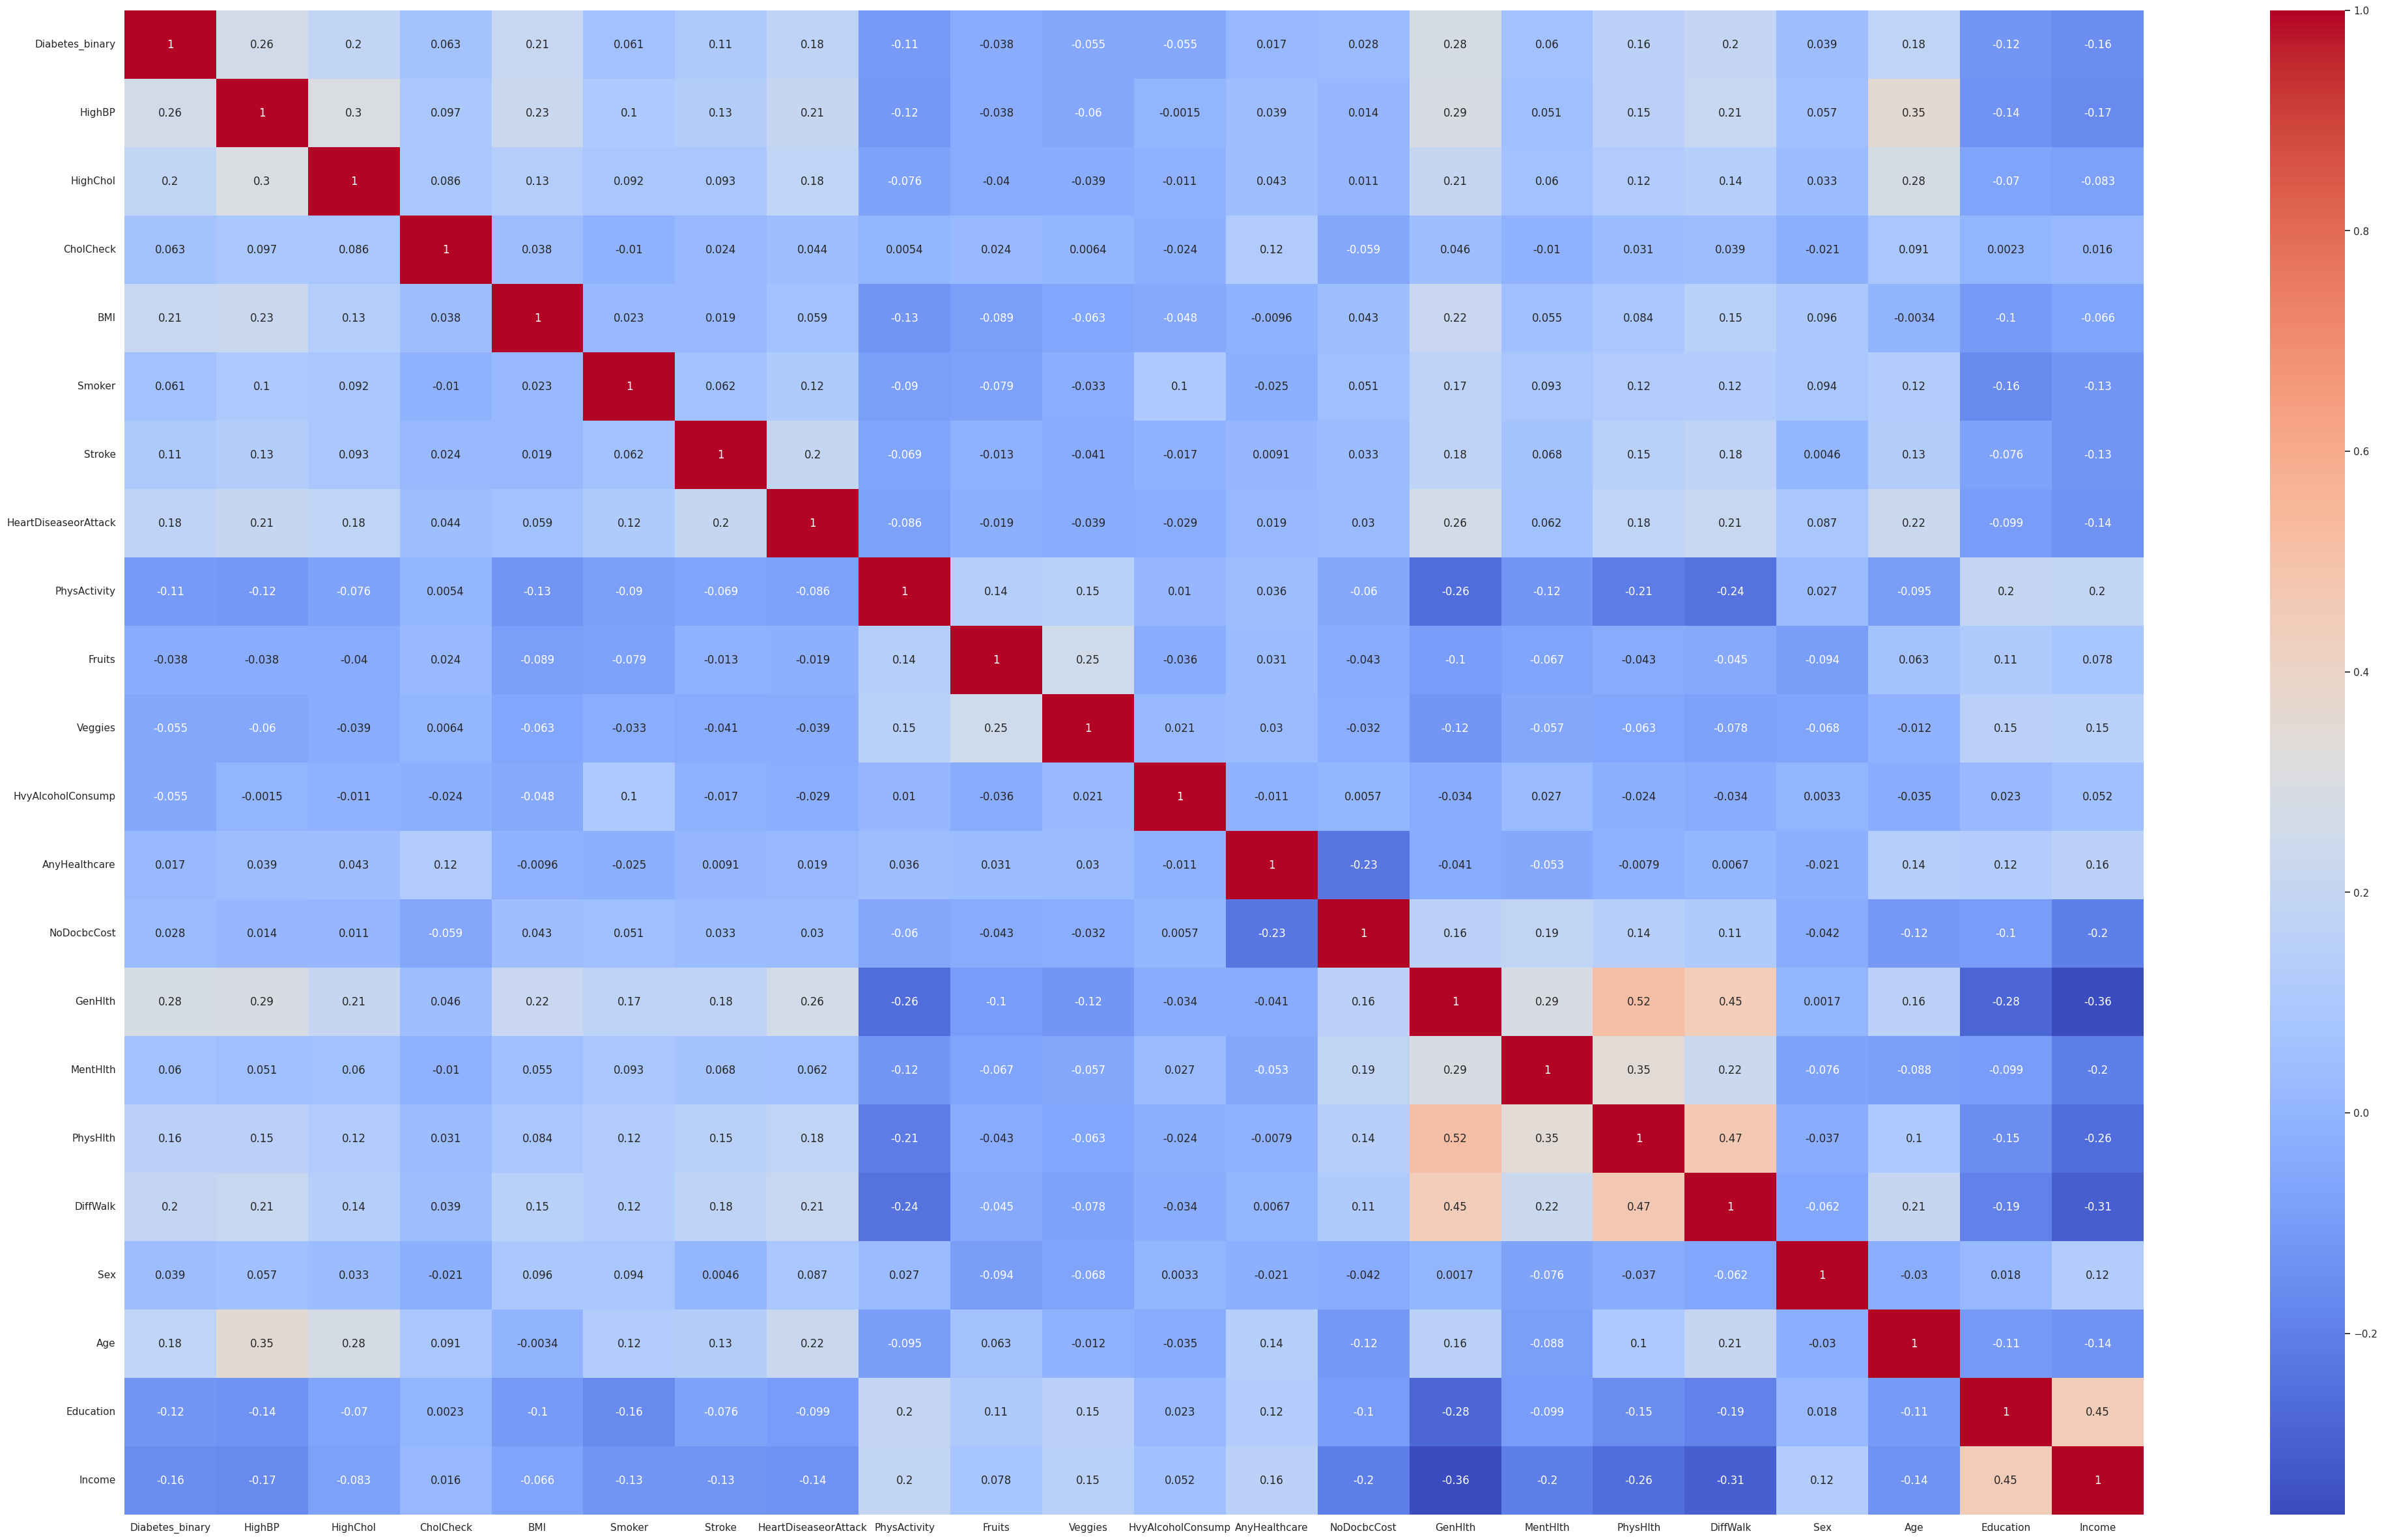

In [245]:
# heat map

plt.figure(figsize=(50, 30))
sns.heatmap(new_df.corr(), annot=True, cmap="coolwarm")
plt.show()


## Dropping Irrelvant Columns

In [246]:
new_df_predicitor = new_df.drop(['Education' , 'Income'] , axis = 1)

In [247]:
new_df_predicitor.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


<Axes: xlabel='Diabetes_binary', ylabel='Count'>

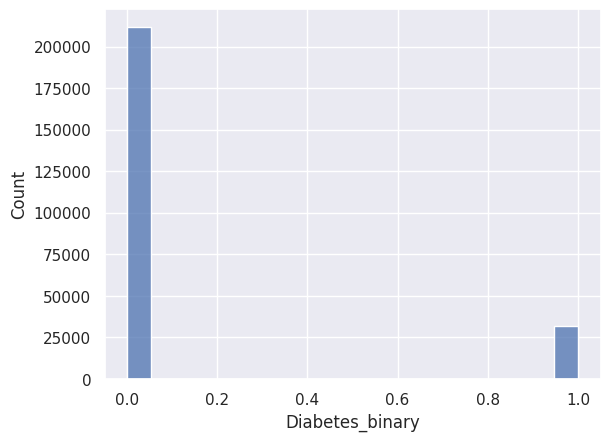

In [248]:
sns.histplot(new_df_predicitor, x='Diabetes_binary')

In [249]:
X = new_df_predicitor.drop(['Diabetes_binary'], axis=1)
y = new_df_predicitor['Diabetes_binary']

In [250]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


In [251]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_binary, dtype: float64

# Feature Scaling

In [252]:
bmi_data = X['BMI']
age = X['Age']
men_health_data = X['MentHlth']
phy_health_data = X['PhysHlth']

In [253]:
X_scaled = X.drop(['BMI' ,'Age', 'MentHlth','PhysHlth'] , axis = 1)

In [254]:
X_scaled.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0


In [255]:
columns_to_scale = [bmi_data , age,men_health_data,phy_health_data]

In [256]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(columns_to_scale)

In [257]:
scaled_data

array([[ 1.66447944,  1.66299436,  0.42409446, ...,  1.72794398,
         1.64996352,  1.61601695],
       [-0.98161608, -0.0978232 , -1.72465082, ..., -0.46359473,
        -0.05322463,  0.04897021],
       [-0.2133948 , -0.78258558,  0.65027818, ..., -0.63217463,
        -0.79836944, -0.83249358],
       [-0.46946856, -0.78258558,  0.65027818, ..., -0.63217463,
        -0.79836944, -0.83249358]])

In [258]:
column_names= ['BMI' ,'Age', 'MentHlth','PhysHlth']
for i in range(len(column_names)):
  X_scaled[column_names[i]] = scaled_data[i]
X_scaled.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,BMI,Age,MentHlth,PhysHlth
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,1.664479,-0.981616,-0.213395,-0.469469
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.662994,-0.097823,-0.782586,-0.782586
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,0.0,0.424094,-1.724651,0.650278,0.650278
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.582755,0.135665,-0.859210,-0.859210
4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.561308,0.161515,-0.699896,-1.022926


# Splitting the Data

In [259]:
# prompt: train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


In [260]:
X_train.shape

(195088, 19)

In [261]:
X_test.shape

(48772, 19)

In [262]:
y_train.shape

(195088,)

In [263]:
y_test.shape


(48772,)

# Performing Sampling

## OverSampling

In [264]:
# SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X_scaled, y)

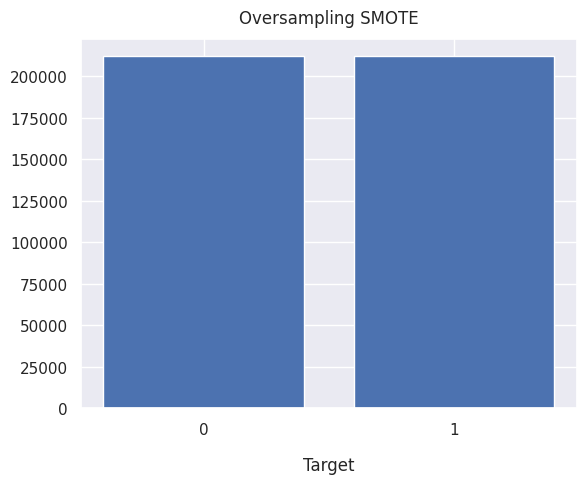

Diabetes_binary
0.0    211879
1.0    211879
Name: count, dtype: int64

In [265]:
# Oversampling SMOTE
sns.set(font_scale=1.0)
smote_counts = y_resampled_smote.value_counts()

plt.bar(smote_counts.index, smote_counts.values)
plt.xlabel("Target", labelpad=14)
plt.xticks([0, 1])
plt.title("Oversampling SMOTE", y=1.02);
plt.show()

smote_counts

## Under Sampling

In [266]:
# RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_scaled, y)

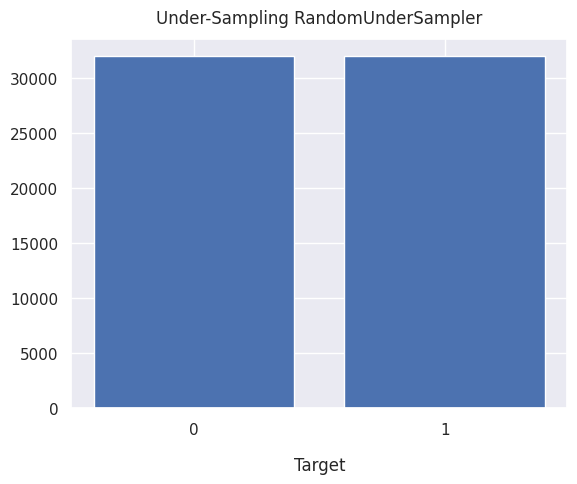

Diabetes_binary
0.0    31981
1.0    31981
Name: count, dtype: int64

In [267]:
# Under-Sampling RandomUnderSampler
sns.set(font_scale=1.0)
rus_counts = y_resampled_rus.value_counts()

plt.bar(rus_counts.index, rus_counts.values)
plt.xlabel("Target", labelpad=14)
plt.xticks([0, 1])
plt.title("Under-Sampling RandomUnderSampler", y=1.02);
plt.show()

rus_counts

## Over and Under Sampling

In [268]:
# SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled_smoteenn, y_resampled_smoteenn = smoteenn.fit_resample(X_scaled, y)

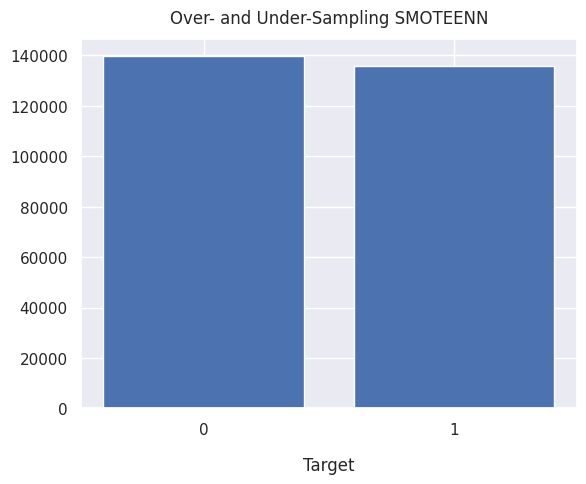

Diabetes_binary
0.0    139627
1.0    135899
Name: count, dtype: int64

In [269]:
# Over- and Under-Sampling SMOTEENN
sns.set(font_scale=1.0)
smoteenn_counts = y_resampled_smoteenn.value_counts()

plt.bar(smoteenn_counts.index, smoteenn_counts.values)
plt.xlabel("Target", labelpad=14)
plt.xticks([0, 1])
plt.title("Over- and Under-Sampling SMOTEENN", y=1.02);
plt.show()

smoteenn_counts

In [270]:
# Oversampling SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled_smote, y_resampled_smote,
                                                                            test_size=0.2, random_state=42)
len(X_train_smote), len(X_test_smote), len(y_train_smote), len(y_test_smote)

(339006, 84752, 339006, 84752)

In [271]:
# Under-Sampling RandomUnderSampler
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_resampled_rus, y_resampled_rus,
                                                                    test_size=0.2, random_state=42)
len(X_train_rus), len(X_test_rus), len(y_train_rus), len(y_test_rus)

(51169, 12793, 51169, 12793)

In [272]:
# Over- and Under-Sampling SMOTEENN
X_train_smoteenn, X_test_smoteenn, y_train_smoteenn, y_test_smoteenn = train_test_split(X_resampled_smoteenn, y_resampled_smoteenn,
                                                                    test_size=0.2, random_state=42)
len(X_train_smoteenn), len(X_test_smoteenn), len(y_train_smoteenn), len(y_test_smoteenn)

(220420, 55106, 220420, 55106)

# logistic regression

In [273]:

# raw
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [274]:
# oversampling
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [275]:
# undersampling
model_rus = LogisticRegression()
model_rus.fit(X_train_rus, y_train_rus)

LogisticRegression()

In [276]:
# over and undersampling
model_smoteenn = LogisticRegression()
model_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

LogisticRegression()

In [277]:
# Raw Data
y_test_pred = model.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred))

accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nTest Set Accuracy:", accuracy_test)


Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     42282
         1.0       0.50      0.10      0.17      6490

    accuracy                           0.87     48772
   macro avg       0.69      0.54      0.55     48772
weighted avg       0.83      0.87      0.83     48772


Test Set Accuracy: 0.8669113425736078


In [278]:
# Over-Sampling SMOTE
y_test_pred_smote = model_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_smote))

accuracy_test_smote = accuracy_score(y_test_smote, y_test_pred_smote)

print("\nTest Set Accuracy:", accuracy_test_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72     42421
         1.0       0.72      0.75      0.73     42331

    accuracy                           0.73     84752
   macro avg       0.73      0.73      0.73     84752
weighted avg       0.73      0.73      0.73     84752


Test Set Accuracy: 0.7285845761751935


In [279]:
# Under-Sampling RandomUnderSampler
y_test_pred_rus = model_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_rus))

accuracy_test_rus = accuracy_score(y_test_rus, y_test_pred_rus)

print("\nTest Set Accuracy:", accuracy_test_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72      6388
         1.0       0.72      0.75      0.73      6405

    accuracy                           0.73     12793
   macro avg       0.73      0.73      0.73     12793
weighted avg       0.73      0.73      0.73     12793


Test Set Accuracy: 0.7283670757445478


In [280]:
# Over and Under-Sampling SMTOEENN
y_test_pred_smoteenn = model_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_smoteenn))

accuracy_test_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_smoteenn)

print("\nTest Set Accuracy:", accuracy_test_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85     27677
         1.0       0.84      0.85      0.85     27429

    accuracy                           0.85     55106
   macro avg       0.85      0.85      0.85     55106
weighted avg       0.85      0.85      0.85     55106


Test Set Accuracy: 0.8456429426922658


# Decision Tree


In [281]:
# prompt: decision tree

from sklearn.tree import DecisionTreeClassifier

# Raw Data
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)



DecisionTreeClassifier()

In [282]:
# Over-Sampling SMOTE
model_tree_smote = DecisionTreeClassifier()
model_tree_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [283]:
# Under-Sampling RandomUnderSampler
model_tree_rus = DecisionTreeClassifier()
model_tree_rus.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier()

In [284]:
# Over and Under-Sampling SMOTEENN
model_tree_smoteenn = DecisionTreeClassifier()
model_tree_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

DecisionTreeClassifier()

In [285]:
# Raw Data
y_test_pred_tree = model_tree.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred_tree))

accuracy_test_tree = accuracy_score(y_test, y_test_pred_tree)

print("\nTest Set Accuracy:", accuracy_test_tree)


Test Set:
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90     42282
         1.0       0.29      0.26      0.28      6490

    accuracy                           0.82     48772
   macro avg       0.59      0.58      0.59     48772
weighted avg       0.81      0.82      0.81     48772


Test Set Accuracy: 0.8167596161732141


In [286]:
# Over-Sampling SMOTE
y_test_pred_tree_smote = model_tree_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_tree_smote))

accuracy_test_tree_smote = accuracy_score(y_test_smote, y_test_pred_tree_smote)

print("\nTest Set Accuracy:", accuracy_test_tree_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82     42421
         1.0       0.83      0.81      0.82     42331

    accuracy                           0.82     84752
   macro avg       0.82      0.82      0.82     84752
weighted avg       0.82      0.82      0.82     84752


Test Set Accuracy: 0.8218095148197093


In [287]:
# Under-Sampling RandomUnderSampler
y_test_pred_tree_rus = model_tree_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_tree_rus))

accuracy_test_tree_rus = accuracy_score(y_test_rus, y_test_pred_tree_rus)

print("\nTest Set Accuracy:", accuracy_test_tree_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.64      0.67      0.66      6388
         1.0       0.66      0.63      0.64      6405

    accuracy                           0.65     12793
   macro avg       0.65      0.65      0.65     12793
weighted avg       0.65      0.65      0.65     12793


Test Set Accuracy: 0.6494176502774955


In [288]:

# Over and Under-Sampling SMTOEENN
y_test_pred_tree_smoteenn = model_tree_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_tree_smoteenn))

accuracy_test_tree_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_tree_smoteenn)

print("\nTest Set Accuracy:", accuracy_test_tree_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     27677
         1.0       0.94      0.93      0.93     27429

    accuracy                           0.94     55106
   macro avg       0.94      0.94      0.94     55106
weighted avg       0.94      0.94      0.94     55106


Test Set Accuracy: 0.9352702065110877


# Random Forest


In [289]:
# prompt: random forest

# Raw Data
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(random_state=42)
model_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [290]:
# Over-Sampling SMOTE
model_forest_smote = RandomForestClassifier(random_state=42)
model_forest_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [291]:
# Over-Sampling SMOTE
model_forest_smote = RandomForestClassifier(random_state=42)
model_forest_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [292]:
# Under-Sampling RandomUnderSampler
model_forest_rus = RandomForestClassifier(random_state=42)
model_forest_rus.fit(X_train_rus, y_train_rus)

RandomForestClassifier(random_state=42)

In [293]:
# Over and Under-Sampling SMOTEENN
model_forest_smoteenn = RandomForestClassifier(random_state=42)
model_forest_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

RandomForestClassifier(random_state=42)

In [294]:
# Raw Data
y_test_pred_forest = model_forest.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred_forest))

accuracy_test_forest = accuracy_score(y_test, y_test_pred_forest)

print("\nTest Set Accuracy:", accuracy_test_forest)


Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     42282
         1.0       0.39      0.16      0.23      6490

    accuracy                           0.85     48772
   macro avg       0.63      0.56      0.57     48772
weighted avg       0.82      0.85      0.83     48772


Test Set Accuracy: 0.8543836627573198


In [295]:
# Over-Sampling SMOTE
y_test_pred_forest_smote = model_forest_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_forest_smote))

accuracy_test_forest_smote = accuracy_score(y_test_smote, y_test_pred_forest_smote)

print("\nTest Set Accuracy:", accuracy_test_forest_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86     42421
         1.0       0.85      0.87      0.86     42331

    accuracy                           0.86     84752
   macro avg       0.86      0.86      0.86     84752
weighted avg       0.86      0.86      0.86     84752


Test Set Accuracy: 0.8587997923352841


In [296]:
# Under-Sampling RandomUnderSampler
y_test_pred_forest_rus = model_forest_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_forest_rus))

accuracy_test_forest_rus = accuracy_score(y_test_rus, y_test_pred_forest_rus)

print("\nTest Set Accuracy:", accuracy_test_forest_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.72      0.67      0.69      6388
         1.0       0.69      0.73      0.71      6405

    accuracy                           0.70     12793
   macro avg       0.70      0.70      0.70     12793
weighted avg       0.70      0.70      0.70     12793


Test Set Accuracy: 0.7042914093644962


In [297]:
# Over and Under-Sampling SMTOEENN
y_test_pred_forest_smoteenn = model_forest_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_forest_smoteenn))

accuracy_test_forest_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_forest_smoteenn)

print("\nTest Set Accuracy:", accuracy_test_forest_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97     27677
         1.0       0.96      0.97      0.97     27429

    accuracy                           0.97     55106
   macro avg       0.97      0.97      0.97     55106
weighted avg       0.97      0.97      0.97     55106


Test Set Accuracy: 0.9671542118825536


# XGBoost

In [298]:
# Raw Data
from xgboost import XGBClassifier
model_xgboost = XGBClassifier(random_state=42)
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [299]:
# Over-Sampling SMOTE
model_xgboost_smote = XGBClassifier(random_state=42)
model_xgboost_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [300]:
# Under-Sampling RandomUnderSampler
model_xgboost_rus = XGBClassifier(random_state=42)
model_xgboost_rus.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [301]:
# Over and Under-Sampling SMOTEENN
model_xgboost_smoteenn = XGBClassifier(random_state=42)
model_xgboost_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [302]:
# Raw Data
y_test_pred_xgboost = model_xgboost.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred_xgboost))

accuracy_test_xgboost = accuracy_score(y_test, y_test_pred_xgboost)

print("\nTest Set Accuracy:", accuracy_test_xgboost)


Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     42282
         1.0       0.52      0.11      0.18      6490

    accuracy                           0.87     48772
   macro avg       0.70      0.55      0.55     48772
weighted avg       0.83      0.87      0.83     48772


Test Set Accuracy: 0.8682235709013368


In [303]:
# Over-Sampling SMOTE
y_test_pred_xgboost_smote = model_xgboost_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_xgboost_smote))

accuracy_test_xgboost_smote = accuracy_score(y_test_smote, y_test_pred_xgboost_smote)

print("\nTest Set Accuracy:", accuracy_test_xgboost_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83     42421
         1.0       0.82      0.84      0.83     42331

    accuracy                           0.83     84752
   macro avg       0.83      0.83      0.83     84752
weighted avg       0.83      0.83      0.83     84752


Test Set Accuracy: 0.8306588635076458


In [304]:
# Under-Sampling RandomUnderSampler
y_test_pred_xgboost_rus = model_xgboost_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_xgboost_rus))

accuracy_test_xgboost_rus = accuracy_score(y_test_rus, y_test_pred_xgboost_rus)

print("\nTest Set Accuracy:", accuracy_test_xgboost_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      6388
         1.0       0.72      0.77      0.74      6405

    accuracy                           0.73     12793
   macro avg       0.73      0.73      0.73     12793
weighted avg       0.73      0.73      0.73     12793


Test Set Accuracy: 0.7319627921519581


In [305]:
# Over and Under-Sampling SMTOEENN
y_test_pred_xgboost_smoteenn = model_xgboost_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_xgboost_smoteenn))

accuracy_test_xgboost_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_xgboost_smoteenn)

print("\nTest Set Accuracy:", accuracy_test_xgboost_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     27677
         1.0       0.92      0.92      0.92     27429

    accuracy                           0.92     55106
   macro avg       0.92      0.92      0.92     55106
weighted avg       0.92      0.92      0.92     55106


Test Set Accuracy: 0.9207345842557979


# KNN

In [306]:
# Raw Data
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [307]:
# Over-Sampling SMOTE
model_knn_smote = KNeighborsClassifier()
model_knn_smote.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [308]:
# Over-Sampling SMOTE
model_knn_smote = KNeighborsClassifier()
model_knn_smote.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [309]:
# Under-Sampling RandomUnderSampler
model_knn_rus = KNeighborsClassifier()
model_knn_rus.fit(X_train_rus, y_train_rus)

KNeighborsClassifier()

In [310]:
# Over and Under-Sampling SMOTEENN
model_knn_smoteenn = KNeighborsClassifier()
model_knn_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

KNeighborsClassifier()

In [311]:
# Raw Data
y_test_pred_knn = model_knn.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred_knn))

accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)

print("\nTest Set Accuracy:", accuracy_test_knn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     42282
         1.0       0.38      0.19      0.25      6490

    accuracy                           0.85     48772
   macro avg       0.63      0.57      0.58     48772
weighted avg       0.82      0.85      0.83     48772


Test Set Accuracy: 0.8503649635036497


In [312]:
# Over-Sampling SMOTE
y_test_pred_knn_smote = model_knn_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_knn_smote))

accuracy_test_knn_smote = accuracy_score(y_test_smote, y_test_pred_knn_smote)

print("\nTest Set Accuracy:", accuracy_test_knn_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.84      0.75      0.79     42421
         1.0       0.78      0.85      0.81     42331

    accuracy                           0.80     84752
   macro avg       0.81      0.80      0.80     84752
weighted avg       0.81      0.80      0.80     84752


Test Set Accuracy: 0.8035798565225599


In [313]:
# Under-Sampling RandomUnderSampler
y_test_pred_knn_rus = model_knn_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_knn_rus))

accuracy_test_knn_rus = accuracy_score(y_test_rus, y_test_pred_knn_rus)

print("\nTest Set Accuracy:", accuracy_test_knn_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.71      0.66      0.69      6388
         1.0       0.69      0.73      0.71      6405

    accuracy                           0.70     12793
   macro avg       0.70      0.70      0.70     12793
weighted avg       0.70      0.70      0.70     12793


Test Set Accuracy: 0.697725318533573


In [314]:
# Over and Under-Sampling SMTOEENN
y_test_pred_knn_smoteenn = model_knn_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_knn_smoteenn))

accuracy_test_knn_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_knn_smoteenn)

print("\nTest Set Accuracy:", accuracy_test_knn_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     27677
         1.0       0.94      0.96      0.95     27429

    accuracy                           0.95     55106
   macro avg       0.95      0.95      0.95     55106
weighted avg       0.95      0.95      0.95     55106


Test Set Accuracy: 0.9528182049141655


# Catboost

In [315]:
pip install catboost

In [316]:
# Raw Data
from catboost import CatBoostClassifier

model_catboost = CatBoostClassifier(random_state=42)
model_catboost.fit(X_train, y_train)

Learning rate set to 0.097918
0:	learn: 0.6023790	total: 33.9ms	remaining: 33.8s
1:	learn: 0.5363865	total: 64.8ms	remaining: 32.3s
2:	learn: 0.4834877	total: 116ms	remaining: 38.6s
3:	learn: 0.4458764	total: 178ms	remaining: 44.2s
4:	learn: 0.4190485	total: 231ms	remaining: 45.9s
5:	learn: 0.3973048	total: 290ms	remaining: 48.1s
6:	learn: 0.3800624	total: 350ms	remaining: 49.6s
7:	learn: 0.3672729	total: 410ms	remaining: 50.9s
8:	learn: 0.3576956	total: 475ms	remaining: 52.3s
9:	learn: 0.3490959	total: 518ms	remaining: 51.3s
10:	learn: 0.3441526	total: 571ms	remaining: 51.4s
11:	learn: 0.3397870	total: 623ms	remaining: 51.3s
12:	learn: 0.3350705	total: 664ms	remaining: 50.4s
13:	learn: 0.3326390	total: 719ms	remaining: 50.6s
14:	learn: 0.3294451	total: 761ms	remaining: 50s
15:	learn: 0.3268703	total: 811ms	remaining: 49.8s
16:	learn: 0.3254544	total: 868ms	remaining: 50.2s
17:	learn: 0.3240629	total: 930ms	remaining: 50.7s
18:	learn: 0.3224323	total: 993ms	remaining: 51.3s
19:	learn: 

In [317]:
# Over-Sampling SMOTE
model_catboost_smote = CatBoostClassifier(random_state=42)
model_catboost_smote.fit(X_train_smote, y_train_smote)

Learning rate set to 0.123975
0:	learn: 0.6526831	total: 59.8ms	remaining: 59.7s
1:	learn: 0.6217978	total: 119ms	remaining: 59.2s
2:	learn: 0.5979984	total: 175ms	remaining: 58.3s
3:	learn: 0.5813768	total: 235ms	remaining: 58.4s
4:	learn: 0.5685733	total: 289ms	remaining: 57.5s
5:	learn: 0.5569417	total: 345ms	remaining: 57.2s
6:	learn: 0.5488791	total: 401ms	remaining: 56.9s
7:	learn: 0.5420954	total: 462ms	remaining: 57.3s
8:	learn: 0.5357460	total: 518ms	remaining: 57.1s
9:	learn: 0.5307672	total: 581ms	remaining: 57.5s
10:	learn: 0.5275028	total: 638ms	remaining: 57.3s
11:	learn: 0.5236524	total: 701ms	remaining: 57.7s
12:	learn: 0.5198994	total: 759ms	remaining: 57.6s
13:	learn: 0.5178519	total: 846ms	remaining: 59.6s
14:	learn: 0.5151368	total: 946ms	remaining: 1m 2s
15:	learn: 0.5110136	total: 1.18s	remaining: 1m 12s
16:	learn: 0.5079659	total: 1.24s	remaining: 1m 11s
17:	learn: 0.5058358	total: 1.32s	remaining: 1m 11s
18:	learn: 0.5029312	total: 1.44s	remaining: 1m 14s
19:	le

In [318]:
# Over-Sampling SMOTE
model_catboost_smote = CatBoostClassifier(random_state=42)
model_catboost_smote.fit(X_train_smote, y_train_smote)

Learning rate set to 0.123975
0:	learn: 0.6526831	total: 61.5ms	remaining: 1m 1s
1:	learn: 0.6217978	total: 120ms	remaining: 59.9s
2:	learn: 0.5979984	total: 187ms	remaining: 1m 2s
3:	learn: 0.5813768	total: 247ms	remaining: 1m 1s
4:	learn: 0.5685733	total: 302ms	remaining: 1m
5:	learn: 0.5569417	total: 359ms	remaining: 59.5s
6:	learn: 0.5488791	total: 420ms	remaining: 59.6s
7:	learn: 0.5420954	total: 478ms	remaining: 59.3s
8:	learn: 0.5357460	total: 533ms	remaining: 58.7s
9:	learn: 0.5307672	total: 593ms	remaining: 58.7s
10:	learn: 0.5275028	total: 654ms	remaining: 58.8s
11:	learn: 0.5236524	total: 713ms	remaining: 58.7s
12:	learn: 0.5198994	total: 777ms	remaining: 59s
13:	learn: 0.5178519	total: 831ms	remaining: 58.5s
14:	learn: 0.5151368	total: 886ms	remaining: 58.2s
15:	learn: 0.5110136	total: 942ms	remaining: 58s
16:	learn: 0.5079659	total: 995ms	remaining: 57.5s
17:	learn: 0.5058358	total: 1.05s	remaining: 57.6s
18:	learn: 0.5029312	total: 1.11s	remaining: 57.5s
19:	learn: 0.5005

In [319]:
# Under-Sampling RandomUnderSampler
model_catboost_rus = CatBoostClassifier(random_state=42)
model_catboost_rus.fit(X_train_rus, y_train_rus)

Learning rate set to 0.055294
0:	learn: 0.6759188	total: 8.79ms	remaining: 8.78s
1:	learn: 0.6608860	total: 17.3ms	remaining: 8.62s
2:	learn: 0.6471167	total: 25.4ms	remaining: 8.46s
3:	learn: 0.6351754	total: 34ms	remaining: 8.46s
4:	learn: 0.6245806	total: 41.8ms	remaining: 8.32s
5:	learn: 0.6153394	total: 50.3ms	remaining: 8.34s
6:	learn: 0.6072853	total: 58.8ms	remaining: 8.34s
7:	learn: 0.6000310	total: 67.3ms	remaining: 8.35s
8:	learn: 0.5934276	total: 75.8ms	remaining: 8.35s
9:	learn: 0.5878367	total: 84.3ms	remaining: 8.34s
10:	learn: 0.5831160	total: 92.4ms	remaining: 8.31s
11:	learn: 0.5783984	total: 101ms	remaining: 8.31s
12:	learn: 0.5742970	total: 109ms	remaining: 8.28s
13:	learn: 0.5706422	total: 117ms	remaining: 8.27s
14:	learn: 0.5673685	total: 127ms	remaining: 8.36s
15:	learn: 0.5643280	total: 136ms	remaining: 8.38s
16:	learn: 0.5614177	total: 144ms	remaining: 8.35s
17:	learn: 0.5591159	total: 153ms	remaining: 8.35s
18:	learn: 0.5570392	total: 162ms	remaining: 8.34s
19

In [320]:
# Over and Under-Sampling SMOTEENN
model_catboost_smoteenn = CatBoostClassifier(random_state=42)
model_catboost_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

Learning rate set to 0.103158
0:	learn: 0.6068398	total: 45.1ms	remaining: 45.1s
1:	learn: 0.5433104	total: 83.8ms	remaining: 41.8s
2:	learn: 0.4944300	total: 122ms	remaining: 40.7s
3:	learn: 0.4583039	total: 162ms	remaining: 40.3s
4:	learn: 0.4318850	total: 205ms	remaining: 40.7s
5:	learn: 0.4117157	total: 247ms	remaining: 40.9s
6:	learn: 0.3958947	total: 286ms	remaining: 40.6s
7:	learn: 0.3839785	total: 327ms	remaining: 40.6s
8:	learn: 0.3736440	total: 367ms	remaining: 40.4s
9:	learn: 0.3649568	total: 408ms	remaining: 40.4s
10:	learn: 0.3592234	total: 447ms	remaining: 40.2s
11:	learn: 0.3537019	total: 485ms	remaining: 40s
12:	learn: 0.3497799	total: 523ms	remaining: 39.7s
13:	learn: 0.3451159	total: 560ms	remaining: 39.5s
14:	learn: 0.3411948	total: 603ms	remaining: 39.6s
15:	learn: 0.3378502	total: 644ms	remaining: 39.6s
16:	learn: 0.3348380	total: 683ms	remaining: 39.5s
17:	learn: 0.3321397	total: 719ms	remaining: 39.2s
18:	learn: 0.3295721	total: 763ms	remaining: 39.4s
19:	learn: 

In [321]:
# Raw Data
y_test_pred_catboost = model_catboost.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred_catboost))

accuracy_test_catboost = accuracy_score(y_test, y_test_pred_catboost)

print("\nTest Set Accuracy:", accuracy_test_catboost)


Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     42282
         1.0       0.53      0.11      0.18      6490

    accuracy                           0.87     48772
   macro avg       0.70      0.55      0.55     48772
weighted avg       0.83      0.87      0.83     48772


Test Set Accuracy: 0.8685311244156483


In [322]:
# Over-Sampling SMOTE
y_test_pred_catboost_smote = model_catboost_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_catboost_smote))

accuracy_test_catboost_smote = accuracy_score(y_test_smote, y_test_pred_catboost_smote)

print("\nTest Set Accuracy:", accuracy_test_catboost_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85     42421
         1.0       0.86      0.83      0.85     42331

    accuracy                           0.85     84752
   macro avg       0.85      0.85      0.85     84752
weighted avg       0.85      0.85      0.85     84752


Test Set Accuracy: 0.8502690202001133


In [323]:
# Under-Sampling RandomUnderSampler
y_test_pred_catboost_rus = model_catboost_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_catboost_rus))

accuracy_test_catboost_rus = accuracy_score(y_test_rus, y_test_pred_catboost_rus)

print("\nTest Set Accuracy:", accuracy_test_catboost_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      6388
         1.0       0.72      0.78      0.75      6405

    accuracy                           0.74     12793
   macro avg       0.74      0.74      0.73     12793
weighted avg       0.74      0.74      0.73     12793


Test Set Accuracy: 0.7350895020714453


In [324]:
# Over and Under-Sampling SMTOEENN
y_test_pred_catboost_smoteenn = model_catboost_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_catboost_smoteenn))

accuracy_test_catboost_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_catboost_smoteenn)

print("\nTest Set Accuracy:", accuracy_test_catboost_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     27677
         1.0       0.93      0.93      0.93     27429

    accuracy                           0.93     55106
   macro avg       0.93      0.93      0.93     55106
weighted avg       0.93      0.93      0.93     55106


Test Set Accuracy: 0.9268319239284288


# Adaboost


In [325]:
# Raw Data
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(random_state=42)
model_adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [326]:
# Over-Sampling SMOTE
model_adaboost_smote = AdaBoostClassifier(random_state=42)
model_adaboost_smote.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(random_state=42)

In [327]:
# Over-Sampling SMOTE
model_adaboost_smote = AdaBoostClassifier(random_state=42)
model_adaboost_smote.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(random_state=42)

In [328]:
# Under-Sampling RandomUnderSampler
model_adaboost_rus = AdaBoostClassifier(random_state=42)
model_adaboost_rus.fit(X_train_rus, y_train_rus)

AdaBoostClassifier(random_state=42)

In [329]:
# Over and Under-Sampling SMOTEENN
model_adaboost_smoteenn = AdaBoostClassifier(random_state=42)
model_adaboost_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

AdaBoostClassifier(random_state=42)

In [330]:
# Raw Data
y_test_pred_adaboost = model_adaboost.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred_adaboost))

accuracy_test_adaboost = accuracy_score(y_test, y_test_pred_adaboost)

print("\nTest Set Accuracy:", accuracy_test_adaboost)


Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     42282
         1.0       0.50      0.11      0.18      6490

    accuracy                           0.87     48772
   macro avg       0.69      0.55      0.55     48772
weighted avg       0.83      0.87      0.83     48772


Test Set Accuracy: 0.8669933568440908


In [331]:
# Over-Sampling SMOTE
y_test_pred_adaboost_smote = model_adaboost_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_adaboost_smote))

accuracy_test_adaboost_smote = accuracy_score(y_test_smote, y_test_pred_adaboost_smote)

print("\nTest Set Accuracy:", accuracy_test_adaboost_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75     42421
         1.0       0.74      0.78      0.76     42331

    accuracy                           0.75     84752
   macro avg       0.75      0.75      0.75     84752
weighted avg       0.75      0.75      0.75     84752


Test Set Accuracy: 0.7514276949216537


In [332]:
# Under-Sampling RandomUnderSampler
y_test_pred_adaboost_rus = model_adaboost_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_adaboost_rus))

accuracy_test_adaboost_rus = accuracy_score(y_test_rus, y_test_pred_adaboost_rus)

print("\nTest Set Accuracy:", accuracy_test_adaboost_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73      6388
         1.0       0.73      0.75      0.74      6405

    accuracy                           0.73     12793
   macro avg       0.73      0.73      0.73     12793
weighted avg       0.73      0.73      0.73     12793


Test Set Accuracy: 0.7313374501680606


In [333]:
# Over and Under-Sampling SMTOEENN
y_test_pred_adaboost_smoteenn = model_adaboost_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_adaboost_smoteenn))

y_test_pred_adaboost_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_adaboost_smoteenn)

print("\nTest Set Accuracy:", y_test_pred_adaboost_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     27677
         1.0       0.87      0.86      0.86     27429

    accuracy                           0.87     55106
   macro avg       0.87      0.87      0.87     55106
weighted avg       0.87      0.87      0.87     55106


Test Set Accuracy: 0.8650963597430407


# Comparison

In [334]:
data = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN', 'Catboost', 'Adaboost'],
       'Raw data': [accuracy_test * 100, accuracy_test_tree * 100, accuracy_test_forest * 100, accuracy_test_xgboost * 100, accuracy_test_knn * 100, accuracy_test_catboost * 100, accuracy_test_adaboost * 100],
       'Oversampling': [accuracy_test_smote * 100, accuracy_test_tree_smote * 100, accuracy_test_forest_smote * 100, accuracy_test_xgboost_smote * 100, accuracy_test_knn_smote * 100, accuracy_test_catboost_smote * 100, accuracy_test_adaboost_smote * 100],
       'Undersampling': [accuracy_test_rus * 100, accuracy_test_tree_rus * 100, accuracy_test_forest_rus * 100, accuracy_test_xgboost_rus * 100, accuracy_test_knn_rus * 100, accuracy_test_catboost_rus * 100, accuracy_test_adaboost_rus * 100],
       'Over-under sampling': [accuracy_test_smoteenn * 100, accuracy_test_tree_smoteenn * 100, accuracy_test_forest_smoteenn * 100, accuracy_test_xgboost_smoteenn * 100, accuracy_test_knn_smoteenn * 100, accuracy_test_catboost_smoteenn * 100, y_test_pred_adaboost_smoteenn * 100]}
df = pd.DataFrame(data)
df


,Model,Raw data,Oversampling,Undersampling,Over-under sampling
0,Logistic Regression,86.691134,72.858458,72.836708,84.564294
1,Decision Tree,81.675962,82.180951,64.941765,93.527021
2,Random Forest,85.438366,85.879979,70.429141,96.715421
3,XGBoost,86.822357,83.065886,73.196279,92.073458
4,KNN,85.036496,80.357986,69.772532,95.281820
5,Catboost,86.853112,85.026902,73.508950,92.683192
6,Adaboost,86.699336,75.142769,73.133745,86.509636
